In [1]:
import numpy as np

In [2]:
# Create data
x = np.array([1,2,3,4,5,8,9,10,11,13,15,17])
y = np.zeros(len(x))
#y = np.array([4,3,2,6,3,13,12,8,9,12,10,14])
x = x.reshape(len(x),1)
y = y.reshape(len(x),1)
myData = np.hstack((x,y))

In [7]:
myData

array([[  1.,   0.],
       [  2.,   0.],
       [  3.,   0.],
       [  4.,   0.],
       [  5.,   0.],
       [  8.,   0.],
       [  9.,   0.],
       [ 10.,   0.],
       [ 11.,   0.],
       [ 13.,   0.],
       [ 15.,   0.],
       [ 17.,   0.]])

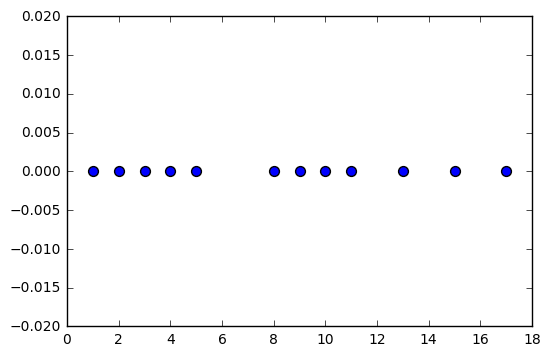

In [3]:
# Plot data
import matplotlib.pyplot as pp
pp.scatter(myData[:,0], myData[:,1], s=50)
pp.show()

In [8]:
# Create two centroids at random
c1 = np.array([2,0])
c2 = np.array([18,0])

In [9]:
from scipy.spatial import distance
d1 = [distance.euclidean(a,c1) for a in myData]
d2 = [distance.euclidean(a,c2) for a in myData]
print (np.vstack((d1,d2)))

[[  1.   0.   1.   2.   3.   6.   7.   8.   9.  11.  13.  15.]
 [ 17.  16.  15.  14.  13.  10.   9.   8.   7.   5.   3.   1.]]


In [10]:
diff = [a-b for a, b in zip(d1, d2)]

In [ ]:
clus = [1 if x >= 0 else 0 for x in diff]
print(clus)

In [ ]:
myData = np.hstack((myData,np.array(clus).reshape(len(clus),1)))
myData

In [ ]:
# To calculate new median
data1 = [[a[0],a[1]] for a in myData if a[2] == 0]
data1

In [ ]:
# To calculate new median
data2 = [[a[0],a[1]] for a in myData if a[2] == 1]
data2

In [ ]:
# New median
c1 = np.median(data1, axis=0)
c1

In [ ]:
# New median
c2 = np.median(data2, axis=0)
c2

In [ ]:
d1 = [distance.euclidean(np.array([a[0],a[1]]),c1) for a in myData]
d2 = [distance.euclidean(np.array([a[0],a[1]]),c2) for a in myData]
print (np.vstack((d1,d2)))

In [ ]:
diff = [a-b for a, b in zip(d1, d2)]

In [ ]:
clus = [1 if x >= 0 else 0 for x in diff]
print(clus)

In [ ]:
myData = np.hstack((myData,np.array(clus).reshape(len(clus),1)))
myData

In [ ]:
# To calculate new median
data1 = [[a[0],a[1]] for a in myData if a[2] == 0]
data1

In [ ]:
# To calculate new median
data2 = [[a[0],a[1]] for a in myData if a[2] == 1]
data2

In [ ]:
# New median
c1 = np.median(data1, axis=0)
c1

In [ ]:
# New median
c2 = np.median(data2, axis=0)
c2

In [ ]:
d1 = [distance.euclidean(np.array([a[0],a[1]]),c1) for a in myData]
d2 = [distance.euclidean(np.array([a[0],a[1]]),c2) for a in myData]
print (np.vstack((d1,d2)))

In [ ]:
diff = [a-b for a, b in zip(d1, d2)]

In [ ]:
clus = [1 if x >= 0 else 0 for x in diff]
print(clus)

In [ ]:
myData = np.hstack((myData,np.array(clus).reshape(len(clus),1)))
myData

In [ ]:
# To calculate new median
data1 = [[a[0],a[1]] for a in myData if a[2] == 0]
data1

In [ ]:
# To calculate new median
data2 = [[a[0],a[1]] for a in myData if a[2] == 1]
data2

In [ ]:
# New median
c1 = np.median(data1, axis=0)
c1

In [ ]:
# New median
c2 = np.median(data2, axis=0)
c2

In [ ]:
d1 = [distance.euclidean(np.array([a[0],a[1]]),c1) for a in myData]
d2 = [distance.euclidean(np.array([a[0],a[1]]),c2) for a in myData]
print (np.vstack((d1,d2)))

In [ ]:
diff = [a-b for a, b in zip(d1, d2)]

In [ ]:
clus = [1 if x >= 0 else 0 for x in diff]
print(clus)

In [ ]:
myData = np.hstack((myData,np.array(clus).reshape(len(clus),1)))
myData

In [ ]:
# Ref: https://gist.github.com/jakevdp/91077b0cae40f8f8244a
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = pp.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

In [ ]:
pp.scatter(myData[:,0], myData[:,1], s = 50, c= myData[:,5], cmap=discrete_cmap(2, 'cubehelix'))
pp.show()

In [ ]:
# -------------------------------------------------------
# K-means using sklearn
# -------------------------------------------------------

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(myData)

In [ ]:
kmeans.labels_

In [ ]:
kmeans.cluster_centers_

In [ ]:
# View the results
# Set the size of the plot
pp.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'yellow'])
 
# Plot the Models Classifications
#pp.subplot(1, 1, 1)
pp.scatter(myData[:,0], myData[:,1], c=colormap[kmeans.labels_], s=60)
pp.title('K Mean Classification')


In [ ]:
pp.show()

In [ ]:
# ---------------------------------------------------------
# Euclidean distance
# ---------------------------------------------------------
p = np.array([1,3,8,3,5])
q = np.array([1,3,9,1,3])
distance.euclidean(p,q)

In [ ]:
# Now to hierarchical clustering

In [ ]:
# Data
myData2 = np.array([[1,2,1,2,3,4,5],
                    [1,1,1,2,3,7,8],
                    [1,1,1,2,3,7,6],
                    [2,5,1,2,3,7,8],
                    [3,1,1,2,3,4,5],
                    [2,4,1,2,3,7,5],
                    [2,4,1,2,3,4,5]
                   ])

In [ ]:
from scipy.spatial import distance

d = distance.pdist(myData2, metric='euclidean')
print(d.shape)

D = distance.squareform(d)
print (D.shape)

print(np.around(D,3))

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
from scipy.cluster import hierarchy

In [ ]:
Z = hierarchy.linkage(myData2, 'single')

In [ ]:
pp.figure()

In [ ]:
dn = hierarchy.dendrogram(Z)

In [ ]:
pp.show()

In [ ]:
# Alternative way

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(myData2) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = pp.subplots(figsize=(15, 20)) # set size
#ax = dendrogram(linkage_matrix, orientation="right");
ax = dendrogram(linkage_matrix);

pp.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    #labelbottom='off'
    )

pp.show() #show plot with tight layout